In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
pd.options.display.max_rows = 100

In [2]:
#Load dummy tables
df_ingredient=pd.read_csv('ingredient_dummy.csv')
df_keyword=pd.read_csv('keyword_dummy.csv')

#load reduced files
# df_ingredient=pd.read_csv('ingredient_dummy_dropna.csv')
# df_keyword=pd.read_csv('keyword_dummy_dropna.csv.csv')

In [3]:
#Table sizes
print('  ingredient ', '    keyword')
print(df_ingredient.shape, df_keyword.shape)

  ingredient      keyword
(522517, 7327) (522517, 342)


# ML Analysis

## Best Ingredients given input

In [4]:
#USER INPUT
recipe_type=['high fiber']
cook_time=['< 4 Hours']
Region=['indian']
# ingredient_list=['mint leaves','white sugar']

input_selection={
    'Health':list(map(str.lower,recipe_type)),
    'Prep Time':list(map(str.lower,cook_time)),
    'Country':list(map(str.lower,Region))}
    # 'Ingredients':list(map(str.lower,ingredient_list))}

In [5]:
df_combined_keyword=df_keyword.copy()
df_combined_ingredient=df_ingredient.copy()

In [6]:
#Filter based on input_selection
# filter = df_combined_keyword[[''.join(input_selection['Health']),''.join(input_selection['Prep Time']), ''.join(input_selection['Country'])]]
# df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)

#TEMP alternative input (To be deleted)
filter = df_combined_keyword[[''.join(input_selection['Country'])]]
df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)
                                                                                              

In [7]:
df_combined_keyword.shape

(5998, 342)

In [8]:
#Select the ingredient table rows that match the keyword table rows after filtering
df_combined = df_combined_ingredient.loc[df_combined_keyword.index]
drop_cols=df_combined.iloc[:,29:].sum()==0   #Column 29 and after is the dummy data
df_combined = df_combined.drop(columns=drop_cols[drop_cols].index,axis=1) #drop all columns that have 0s 
df_combined.dropna(subset=['AggregatedRating'], inplace=True)
df_combined.shape

(2971, 1880)

In [9]:
#training datasets
y=df_combined['AggregatedRating']
# X=df_combined.drop(columns='AggregatedRating')
X = df_combined.drop(columns=df_combined.columns[0:29])

In [10]:
X

,% low-fat milk,-inch flour tortillas,-inch fat-free flour tortillas,baileys irish cream,bombay duck,brussels sprout,bulgar wheat,chinese cabbage,chinese five spice powder,chinese mustard,...,tikka masala sauce,nutty rice,black ground cumin,mint and parsley chutney,helen's mint chutney,mint-coriander chutney,fragrant basmati rice with apple juice and ginger,butter naan,\n),", \n"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

model = LinearRegression()
model.fit(X, y)
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [ 3.98353805e-01  1.26692747e-01  1.38767806e+12 ...  2.47061360e+12
 -8.29223633e-01  5.75531006e-01]
Model's y-intercept: 4.550222810964055
Model's formula: y = 4.550222810964055 + 0.3983538046014865X


In [12]:
# Make predictions using the X set
predicted_y_values = pd.DataFrame(model.predict(X), columns=['predicted values'])
# Create a copy of the original data
df_ingredients_predicted = pd.concat([df_combined['AggregatedRating'].reset_index(),predicted_y_values],axis=1)

# Display sample data
df_ingredients_predicted.head()

,index,AggregatedRating,predicted values
0,1,3.0,3.282248
1,57,5.0,4.864813
2,112,5.0,4.775412
3,186,5.0,4.809012
4,233,4.0,4.251700


In [13]:
#boxplot x-axis
df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values()

Index([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='AggregatedRating')

In [14]:
#Prepping data for boxplot below
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
boxes=[]
labels=[]
for rating in df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values():
    boxes.append(df_ingredients_predicted[df_ingredients_predicted['AggregatedRating']==rating]['predicted values'])
    labels.append(rating)

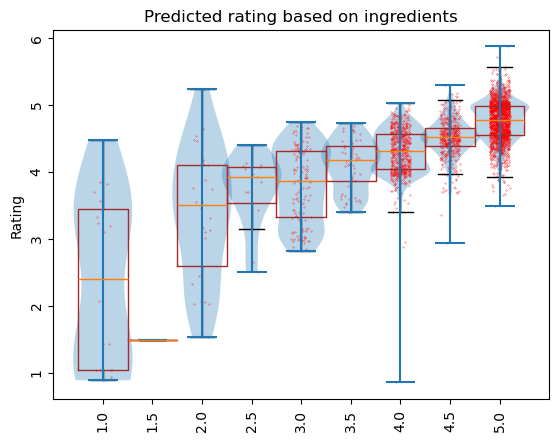

In [15]:
#Plot of predicted Rating based on website input
# plt.figure(figsize=(14,3))
plt.boxplot(boxes,labels=labels, showbox=True, boxprops={'linestyle':'-', 'linewidth':1, 'color':'brown'}, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} , positions=labels)
plt.violinplot(boxes, widths=.6, positions=labels)
plt.scatter(df_ingredients_predicted['AggregatedRating']+0.2*random.rand(len(df_ingredients_predicted['AggregatedRating']),1).ravel()-.1,
            df_ingredients_predicted['predicted values'],marker='o',s=.05,c='r')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('Predicted rating based on ingredients')
# plt.ylim(3,5)
plt.show()

In [16]:
X.sum()

% low-fat milk                                       7
-inch flour tortillas                                1
-inch fat-free flour tortillas                       1
baileys irish cream                                  1
bombay duck                                          1
                                                    ..
mint-coriander chutney                               0
fragrant basmati rice with apple juice and ginger    1
butter naan                                          1
\n)                                                  1
, \n                                                 2
Length: 1851, dtype: int64

In [17]:
#Best ingredients you can use given the website input
best_ingredients = pd.DataFrame({'ingredient': X.columns, 'impact':model.coef_, 'frequency':X.sum()})
# best_ingredients = best_ingredients.drop(index=best_ingredients[(best_ingredients['impact']>1e3)|(best_ingredients['impact']<-1e3)].index).sort_values(by='impact', ascending=False)
best_ingredients = best_ingredients.sort_values(by='impact', ascending=False)
best_ingredients[best_ingredients['frequency']>50].head(10)


,ingredient,impact,frequency
egg,egg,0.273926,78
curry paste,curry paste,0.246338,51
fresh lemon juice,fresh lemon juice,0.209961,92
garam masala powder,garam masala powder,0.180176,81
cayenne,cayenne,0.161377,113
curry powder,curry powder,0.154297,455
coriander powder,coriander powder,0.145508,227
ginger paste,ginger paste,0.139648,108
gingerroot,gingerroot,0.134766,143
cumin seeds,cumin seeds,0.133789,103


In [18]:
#Worst ingredients you can use given the website input
best_ingredients[best_ingredients['frequency']>50].tail(10)

,ingredient,impact,frequency
green chili,green chili,-0.158691,108
bay leaves,bay leaves,-0.180664,139
fennel seed,fennel seed,-0.181152,81
diced tomatoes,diced tomatoes,-0.184570,65
cauliflower,cauliflower,-0.193237,86
boneless skinless chicken breasts,boneless skinless chicken breasts,-0.197998,66
ground black pepper,ground black pepper,-0.199463,63
red onion,red onion,-0.234863,76
chicken breasts,chicken breasts,-0.243164,66
baking powder,baking powder,-0.260010,51


## Dimensionality reduction